<a href="https://colab.research.google.com/github/narae12/aiffel/blob/main/Olist_RFM_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFM 스코어

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2


In [ ]:
import pandas as pd
import os

# 경로 내 파일 목록 확인
files = os.listdir(path)
print("Downloaded files:", files)

Downloaded files: ['olist_order_reviews_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_products_dataset.csv', 'product_category_name_translation.csv', 'olist_geolocation_dataset.csv', 'olist_customers_dataset.csv', 'olist_sellers_dataset.csv']


In [ ]:
# 예시 파일 경로
csv_file = os.path.join(path, "olist_orders_dataset.csv")

# Pandas로 CSV 파일 불러오기
df = pd.read_csv(csv_file)

# 데이터 미리보기
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
o_df = df[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']]
o_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [ ]:
o_df['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [ ]:
# 예시 파일 경로
csv_file = os.path.join(path, "olist_order_items_dataset.csv")

# Pandas로 CSV 파일 불러오기
df2 = pd.read_csv(csv_file)

# 데이터 미리보기
df2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
i_df = df2[['order_id','order_item_id','product_id','price']] #필요한 컬럼만 추출
i_df.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [ ]:
f_df = pd.merge(o_df, i_df, on='order_id', how='left')
f_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90


In [ ]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  113425 non-null  object 
 1   customer_id               113425 non-null  object 
 2   order_status              113425 non-null  object 
 3   order_purchase_timestamp  113425 non-null  object 
 4   order_item_id             112650 non-null  float64
 5   product_id                112650 non-null  object 
 6   price                     112650 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.1+ MB


In [ ]:
f_df.shape

(113425, 7)

In [ ]:
f_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price
count,113425,113425,113425,113425,112650.000000,112650,112650.000000
unique,99441,99441,8,98875,NaN,32951,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,NaN
freq,21,21,110197,21,NaN,527,NaN
mean,NaN,NaN,NaN,NaN,1.197834,NaN,120.653739
std,NaN,NaN,NaN,NaN,0.705124,NaN,183.633928
min,NaN,NaN,NaN,NaN,1.000000,NaN,0.850000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,39.900000
50%,NaN,NaN,NaN,NaN,1.000000,NaN,74.990000
75%,NaN,NaN,NaN,NaN,1.000000,NaN,134.900000


In [ ]:
# 결측치처리
f_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_item_id,775
product_id,775
price,775


In [ ]:
f_df[f_df['order_item_id'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,NaN,NaN,NaN
671,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,NaN,NaN,NaN
791,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,NaN,NaN,NaN
850,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,NaN,NaN,NaN
1294,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN
...,...,...,...,...,...,...,...
113204,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,NaN,NaN,NaN
113236,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN
113324,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN
113325,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaN,NaN,NaN


In [ ]:
#이상치처리
f_df.describe()

,order_item_id,price
count,112650.000000,112650.000000
mean,1.197834,120.653739
std,0.705124,183.633928
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,134.900000
max,21.000000,6735.000000


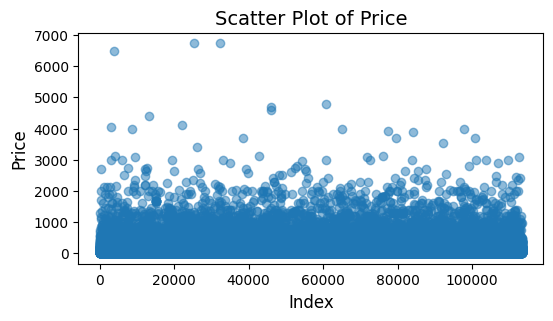

In [ ]:
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(6, 3))
plt.scatter(f_df.index, f_df['price'], alpha=0.5)
plt.title('Scatter Plot of Price', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# 저정도 가격의 고가의 제품이 있을 수 있고, vip고객 판별에 중요하므로 남겨둠

In [ ]:
# order_item_id별 개수 계산
order_item_counts = f_df['order_item_id'].value_counts().reset_index()
order_item_counts
# 이상치가 아니라고 판단하여 제거 x

,order_item_id,count
0,1.0,98666
1,2.0,9803
2,3.0,2287
3,4.0,965
4,5.0,460
5,6.0,256
6,7.0,58
7,8.0,36
8,9.0,28
9,10.0,25


In [ ]:
f_df[f_df['order_item_id'].isna()& f_df['order_status']=='delivered']
# 대부분 주문이 완료되지 않은 상태임을 알 수 있음
# rfm 분석 후 취소율도 분석할 것이기 때문에 결측치는 그대로 둘 것
# 단, monetary계산 시에는 정상 완료 주문(delivered)만 Monetary에 반영(결측치 제거 후 고객별 금액 합산, 혹은 price를 0으로 채워서 계산)

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price


In [ ]:
pip install ace_tools

In [ ]:
#Recency [고객별 최신 구매정도]import pandas as pd

# 1. order_purchase_timestamp를 datetime 형식으로 변환
f_df['order_purchase_timestamp'] = pd.to_datetime(f_df['order_purchase_timestamp'])

# 2. 모든 고객 중 가장 최근 주문일 찾기
max_date = f_df['order_purchase_timestamp'].max()

print(max_date)

2018-10-17 17:30:18


In [ ]:
# 3. 고객별 가장 최근 주문일 계산
customer_recent_order = (
    f_df.groupby('customer_id')['order_purchase_timestamp']
    .max()
    .reset_index()
    .rename(columns={'order_purchase_timestamp': 'customer_recent_order_date'})
)

print(customer_recent_order.head())
print(customer_recent_order.describe())

                        customer_id customer_recent_order_date
0  00012a2ce6f8dcda20d059ce98491703        2017-11-14 16:08:26
1  000161a058600d5901f007fab4c27140        2017-07-16 09:40:32
2  0001fd6190edaaf884bcaf3d49edf079        2017-02-28 11:06:43
3  0002414f95344307404f0ace7a26f1d5        2017-08-16 13:09:20
4  000379cdec625522490c315e70c7a9fb        2018-04-02 13:42:17
          customer_recent_order_date
count                          99441
mean   2017-12-31 08:43:12.776581120
min              2016-09-04 21:15:19
25%              2017-09-12 14:46:19
50%              2018-01-18 23:04:36
75%              2018-05-04 15:42:16
max              2018-10-17 17:30:18


In [ ]:
# 4. Recency 계산
customer_recent_order['Recency'] = (max_date - customer_recent_order['customer_recent_order_date']).dt.days

print(customer_recent_order.head())

                        customer_id customer_recent_order_date  Recency
0  00012a2ce6f8dcda20d059ce98491703        2017-11-14 16:08:26      337
1  000161a058600d5901f007fab4c27140        2017-07-16 09:40:32      458
2  0001fd6190edaaf884bcaf3d49edf079        2017-02-28 11:06:43      596
3  0002414f95344307404f0ace7a26f1d5        2017-08-16 13:09:20      427
4  000379cdec625522490c315e70c7a9fb        2018-04-02 13:42:17      198


In [ ]:
f_df['customer_id'].duplicated().sum()

13984

In [ ]:
#Distinct customer_id로 customer_df 데이터 생성
rfm_df = pd.DataFrame(f_df['customer_id'].unique(), columns=['customer_id'])
rfm_df

,customer_id
0,9ef432eb6251297304e76186b10a928d
1,b0830fb4747a6c6d20dea0b8c802d7ef
2,41ce2a54c0b03bf3443c3d931a367089
3,f88197465ea7920adcdbec7375364d82
4,8ab97904e6daea8866dbdbc4fb7aad2c
...,...
99436,39bd1228ee8140590ac3aca26f2dfe00
99437,1fca14ff2861355f6e5f14306ff977a7
99438,1aa71eb042121263aafbe80c1b562c9c
99439,b331b74b18dc79bcdf6532d51e1637c1


In [ ]:
#원본 데이터에 병합
f_df = f_df.merge(customer_recent_order[['customer_id', 'customer_recent_order_date', 'Recency']], on='customer_id', how='left')
f_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,customer_recent_order_date,Recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99,2017-10-02 10:56:33,380
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,2018-07-24 20:41:37,84
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90,2018-08-08 08:38:49,70
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,2017-11-18 19:28:06,332
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,2018-02-13 21:18:39,245


In [ ]:
#rfm 데이터에도 병합
rfm_df = rfm_df.merge(customer_recent_order[['customer_id','Recency']], on='customer_id', how='left')
rfm_df.head()

,customer_id,Recency
0,9ef432eb6251297304e76186b10a928d,380
1,b0830fb4747a6c6d20dea0b8c802d7ef,84
2,41ce2a54c0b03bf3443c3d931a367089,70
3,f88197465ea7920adcdbec7375364d82,332
4,8ab97904e6daea8866dbdbc4fb7aad2c,245


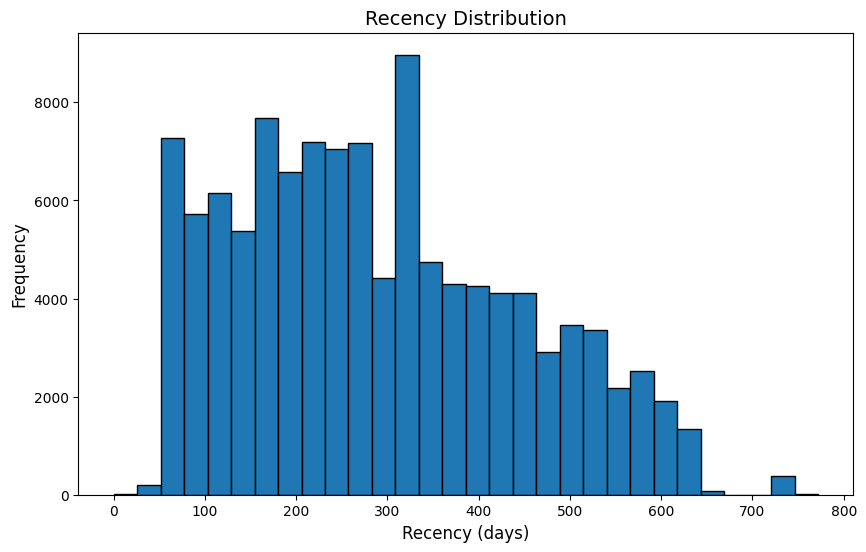

In [ ]:
import matplotlib.pyplot as plt

# Recency 값의 분포를 막대 그래프로 표시 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(f_df['Recency'], bins=30, edgecolor='black')
plt.title('Recency Distribution', fontsize=14)
plt.xlabel('Recency (days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
# frequency [고객별 구매빈도] 계산

In [ ]:
# 중복된 order_id 개수 확인
duplicate_count = f_df['order_id'].duplicated().sum()
print(f"중복된 order_id 개수: {duplicate_count}")

중복된 order_id 개수: 13984


In [ ]:
f_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,customer_recent_order_date,Recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99,2017-10-02 10:56:33,380
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,2018-07-24 20:41:37,84
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90,2018-08-08 08:38:49,70
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,2017-11-18 19:28:06,332
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,2018-02-13 21:18:39,245


In [ ]:
#customer_id별 order_id를 구하여 고객별 거래 건수를
#order_id별 max(order_item_id)구해서 고객별로 집계하여 구매한 아이템의 총수량 구하기
# 두 개 더해서 frequency점수 구하기

# customer_id별 order_id 건수를 계산하고 컬럼명을 order_cnt로 변경
customer_order = f_df.groupby('customer_id')['order_id'].count()
customer_order = pd.DataFrame(customer_order).rename(columns={'order_id': 'order_cnt'})

# 결과 확인
customer_order.head()

,order_cnt
customer_id,
00012a2ce6f8dcda20d059ce98491703,1
000161a058600d5901f007fab4c27140,1
0001fd6190edaaf884bcaf3d49edf079,1
0002414f95344307404f0ace7a26f1d5,1
000379cdec625522490c315e70c7a9fb,1


In [ ]:
customer_order['order_cnt'].value_counts()

,count
order_cnt,
1,89638
2,7516
3,1322
4,505
5,204
6,198
7,22
10,8
8,8


In [ ]:
# order_id별 product_id별로 order_item_id의 최대값 구하기
order_cnt = (
    f_df.groupby(['order_id', 'product_id'])['order_item_id']
    .max()
    .reset_index()
)
order_cnt = order_cnt.rename(columns={'order_item_id': 'per_product_order_cnt'})

# 결과 확인
order_cnt.head()

,order_id,product_id,per_product_order_cnt
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1.0


In [ ]:
# Series를 DataFrame으로 변환한 후 컬럼명 변경
order_total_df = order_cnt.groupby('order_id')['per_product_order_cnt'].sum()
order_total_df = pd.DataFrame(order_total_df).rename(columns={'per_product_order_cnt': 'per_order_cnt'})

# 결과 확인
order_total_df.head()

,per_order_cnt
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1.0
00018f77f2f0320c557190d7a144bdd3,1.0
000229ec398224ef6ca0657da4fc703e,1.0
00024acbcdf0a6daa1e931b038114c75,1.0
00042b26cf59d7ce69dfabb4e55b4fd9,1.0


In [ ]:
order_total_df.value_counts()

,count
per_order_cnt,
1.0,88863
2.0,5005
3.0,3376
6.0,432
4.0,417
5.0,319
10.0,72
7.0,45
9.0,28


In [ ]:
#커스토머별, 오더별 주문한 총수량 구하기
temp_df = f_df[['customer_id','order_id']]
temp_df.head()

,customer_id,order_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159


In [ ]:
temp_df.duplicated().sum()

13984

In [ ]:
temp_df = temp_df.drop_duplicates()

In [ ]:
cnt_df = pd.merge(temp_df, order_total_df, on='order_id', how='left')
cnt_df.head()

,customer_id,order_id,per_order_cnt
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,1.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,1.0
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,1.0
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,1.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,1.0


In [ ]:
# customer_id별 order_cnt 합산
total_customer_cnt = cnt_df.groupby('customer_id')['per_order_cnt'].sum()

# 데이터프레임으로 변환 후 컬럼명 변경
total_customer_cnt = pd.DataFrame(total_customer_cnt).rename(columns={'per_order_cnt': 'total_cnt'})

# 결과 확인
total_customer_cnt.head()

,total_cnt
customer_id,
00012a2ce6f8dcda20d059ce98491703,1.0
000161a058600d5901f007fab4c27140,1.0
0001fd6190edaaf884bcaf3d49edf079,1.0
0002414f95344307404f0ace7a26f1d5,1.0
000379cdec625522490c315e70c7a9fb,1.0


In [ ]:
total_customer_cnt.describe() # 여기부터

,total_cnt
count,99441.000000
mean,1.185065
std,0.862052
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,52.000000


In [ ]:
f_final_df = pd.merge(customer_order, total_customer_cnt, on='customer_id', how='left')
f_final_df.head()

,order_cnt,total_cnt
customer_id,,
00012a2ce6f8dcda20d059ce98491703,1,1.0
000161a058600d5901f007fab4c27140,1,1.0
0001fd6190edaaf884bcaf3d49edf079,1,1.0
0002414f95344307404f0ace7a26f1d5,1,1.0
000379cdec625522490c315e70c7a9fb,1,1.0


In [ ]:
f_final_df.describe()

,order_cnt,total_cnt
count,99441.000000,99441.000000
mean,1.140626,1.185065
std,0.536495,0.862052
min,1.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,21.000000,52.000000


In [ ]:
# F : 고객별 전체 거래건수 + 구매한 아이템의 총수량
f_final_df['Frequency'] = f_final_df['order_cnt'] + f_final_df['total_cnt']
f_final_df.reset_index(inplace=True)
f_final_df.head()

,customer_id,order_cnt,total_cnt,Frequency
0,00012a2ce6f8dcda20d059ce98491703,1,1.0,2.0
1,000161a058600d5901f007fab4c27140,1,1.0,2.0
2,0001fd6190edaaf884bcaf3d49edf079,1,1.0,2.0
3,0002414f95344307404f0ace7a26f1d5,1,1.0,2.0
4,000379cdec625522490c315e70c7a9fb,1,1.0,2.0


In [ ]:
f_final_df.describe()

,order_cnt,total_cnt,Frequency
count,99441.000000,99441.000000,99441.000000
mean,1.140626,1.185065,2.325691
std,0.536495,0.862052,1.360217
min,1.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000
50%,1.000000,1.000000,2.000000
75%,1.000000,1.000000,2.000000
max,21.000000,52.000000,73.000000


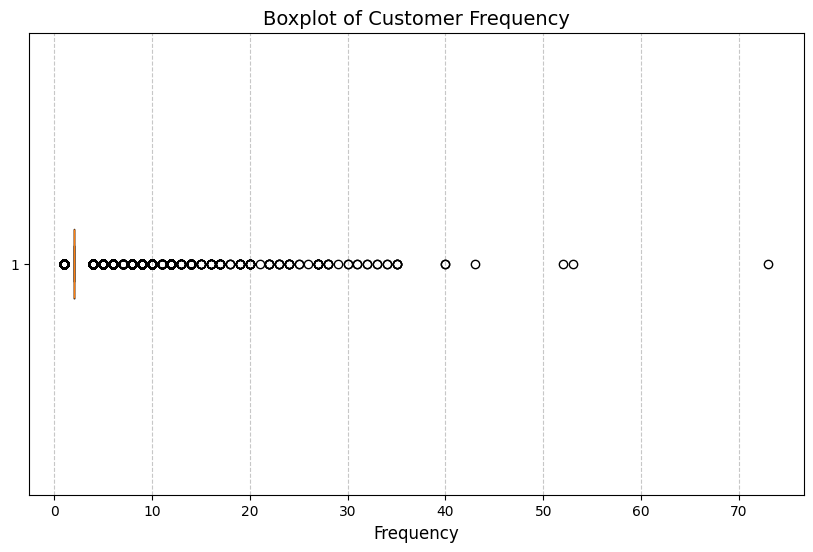

In [ ]:
# 박스플롯 시각화
plt.figure(figsize=(10, 6))
plt.boxplot(f_final_df['Frequency'], vert=False)
plt.xlabel('Frequency', fontsize=12)
plt.title('Boxplot of Customer Frequency', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#원본 데이터에 병합
f_df = f_df.merge(f_final_df[['customer_id','order_cnt',	'total_cnt'	,'Frequency']], on='customer_id', how='left')
f_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,customer_recent_order_date,Recency,order_cnt,total_cnt,Frequency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99,2017-10-02 10:56:33,380,1,1.0,2.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,2018-07-24 20:41:37,84,1,1.0,2.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90,2018-08-08 08:38:49,70,1,1.0,2.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,2017-11-18 19:28:06,332,1,1.0,2.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,2018-02-13 21:18:39,245,1,1.0,2.0


In [ ]:
#rfm 데이터에도 병합
rfm_df = rfm_df.merge(f_final_df[['customer_id','Frequency']], on='customer_id', how='left')
rfm_df.head()

,customer_id,Recency,Frequency
0,9ef432eb6251297304e76186b10a928d,380,2.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,84,2.0
2,41ce2a54c0b03bf3443c3d931a367089,70,2.0
3,f88197465ea7920adcdbec7375364d82,332,2.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,245,2.0


In [ ]:
rfm_df.describe()

,Recency,Frequency
count,99441.000000,99441.000000
mean,289.900192,2.325691
std,153.667316,1.360217
min,0.000000,1.000000
25%,166.000000,2.000000
50%,271.000000,2.000000
75%,400.000000,2.000000
max,772.000000,73.000000


In [ ]:
# monetary(고객별 총 구매액) 구하기
f_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,customer_recent_order_date,Recency,order_cnt,total_cnt,Frequency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99,2017-10-02 10:56:33,380,1,1.0,2.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,2018-07-24 20:41:37,84,1,1.0,2.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90,2018-08-08 08:38:49,70,1,1.0,2.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,2017-11-18 19:28:06,332,1,1.0,2.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,2018-02-13 21:18:39,245,1,1.0,2.0


In [ ]:
order_cnt

,order_id,product_id,per_product_order_cnt
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1.0
...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,1.0
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,1.0
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,1.0
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,1.0


In [ ]:

temp_df_2 = order_cnt.merge(f_df[['customer_id', 'product_id','price']], on='product_id', how='left')
temp_df_2.head()

,order_id,product_id,per_product_order_cnt,customer_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1.0,4ef55bf80f711b372afebcb7c715344a,64.9
1,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1.0,2e76c1f2a920153d79cc98b634c50942,55.9
2,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1.0,4851b3bca4a48b395dfad7aa57c3f72a,55.9
3,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1.0,c32c207d9ebf75958011557ac1624e2f,64.9
4,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1.0,91a792fef70ecd8cc69d3c7feb3d12da,58.9


In [ ]:
# describe() 결과를 정수형으로 변환
temp_df_2.describe().round(0).astype(int)

,per_product_order_cnt,price
count,3623674,3623674
mean,1,97
std,1,92
min,1,1
25%,1,53
50%,1,75
75%,1,117
max,21,6735


In [ ]:
temp_df_2['cnt_price'] = temp_df_2['per_product_order_cnt'] * temp_df_2['price']

# customer_id별로 합산
m_customer_total = temp_df_2.groupby('customer_id')['cnt_price'].sum().reset_index()
m_customer_total = pd.DataFrame(m_customer_total).rename(columns={'cnt_price': 'Monetary'})
# 결과 출력
print(m_customer_total)

                            customer_id  Monetary
0      00012a2ce6f8dcda20d059ce98491703   1616.40
1      000161a058600d5901f007fab4c27140     54.90
2      0001fd6190edaaf884bcaf3d49edf079    179.99
3      0002414f95344307404f0ace7a26f1d5    149.90
4      000379cdec625522490c315e70c7a9fb   1116.00
...                                 ...       ...
98661  fffcb937e9dd47a13f05ecb8290f4d3e     78.00
98662  fffecc9f79fd8c764f843e9951b11341    549.00
98663  fffeda5b6d849fbd39689bb92087f431    239.50
98664  ffff42319e9b2d713724ae527742af25   3798.10
98665  ffffa3172527f765de70084a7e53aae8    436.00

[98666 rows x 2 columns]


In [ ]:
m_customer_total.describe()

,Monetary
count,98666.000000
mean,4001.254193
std,9944.910314
min,2.200000
25%,194.950000
50%,663.240000
75%,2730.000000
max,422086.000000


In [ ]:
#원본 데이터에 병합
f_df = f_df.merge(m_customer_total[['customer_id','Monetary']], on='customer_id', how='left')
f_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,customer_recent_order_date,Recency,order_cnt,total_cnt,Frequency,Monetary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99,2017-10-02 10:56:33,380,1,1.0,2.0,119.96
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,2018-07-24 20:41:37,84,1,1.0,2.0,12700.90
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90,2018-08-08 08:38:49,70,1,1.0,2.0,479.70
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,2017-11-18 19:28:06,332,1,1.0,2.0,180.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,2018-02-13 21:18:39,245,1,1.0,2.0,796.00


In [ ]:
#rfm 데이터에도 병합
rfm_df = rfm_df.merge(m_customer_total[['customer_id','Monetary']], on='customer_id', how='left')
rfm_df.head()

,customer_id,Recency,Frequency,Monetary
0,9ef432eb6251297304e76186b10a928d,380,2.0,119.96
1,b0830fb4747a6c6d20dea0b8c802d7ef,84,2.0,12700.90
2,41ce2a54c0b03bf3443c3d931a367089,70,2.0,479.70
3,f88197465ea7920adcdbec7375364d82,332,2.0,180.00
4,8ab97904e6daea8866dbdbc4fb7aad2c,245,2.0,796.00


In [ ]:
rfm_df.isna().sum()

,0
customer_id,0
Recency,0
Frequency,0
Monetary,775


In [ ]:
rfm_df['Monetary'] = rfm_df['Monetary'].fillna(0)  # NaN → 0으로 대체

In [ ]:

# R, F, M 각각에 점수 부여 (1~5 범위로)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5,4,3,2,1]).astype(int)  # Recency: 낮을수록 좋음
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)  # Frequency: 높을수록 좋음
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)  # Monetary: 높을수록 좋음

# 최종 RFM 스코어 생성
rfm_df['RFM_Score'] = (
    rfm_df['R_Score'].astype(str) +
    rfm_df['F_Score'].astype(str) +
    rfm_df['M_Score'].astype(str)
).astype('int')

In [ ]:
rfm_df.head()

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,9ef432eb6251297304e76186b10a928d,380,2.0,119.96,2,1,1,211
1,b0830fb4747a6c6d20dea0b8c802d7ef,84,2.0,12700.90,5,1,5,515
2,41ce2a54c0b03bf3443c3d931a367089,70,2.0,479.70,5,1,3,513
3,f88197465ea7920adcdbec7375364d82,332,2.0,180.00,2,1,2,212
4,8ab97904e6daea8866dbdbc4fb7aad2c,245,2.0,796.00,3,1,3,313


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  float64
 3   Monetary     99441 non-null  float64
 4   R_Score      99441 non-null  int64  
 5   F_Score      99441 non-null  int64  
 6   M_Score      99441 non-null  int64  
 7   RFM_Score    99441 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 6.1+ MB


In [ ]:
rfm_df.describe()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
count,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000
mean,289.900192,2.325691,3970.070154,3.003178,2.999980,2.999698,333.317274
std,153.667316,1.360217,9912.327886,1.412517,1.414228,1.414071,141.987582
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,111.000000
25%,166.000000,2.000000,187.500000,2.000000,2.000000,2.000000,222.000000
50%,271.000000,2.000000,650.000000,3.000000,3.000000,3.000000,333.000000
75%,400.000000,2.000000,2689.000000,4.000000,4.000000,4.000000,445.000000
max,772.000000,73.000000,422086.000000,5.000000,5.000000,5.000000,555.000000


In [ ]:
# 세그멘트 분류 함수
def segment_customer(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'VIP'
    elif row['F_Score'] >= 4 and row['M_Score'] >= 3:
        return '충성고객'
    elif row['R_Score'] >= 4 and row['M_Score'] >= 3:
        return '잠재VIP'
    elif row['R_Score'] <= 1 and row['F_Score'] >= 3:
        return '이탈위험고객'
    elif row['R_Score'] <= 1 and row['F_Score'] <= 2:
        return '이탈고객'
    else:
        return '일반고객'

# 세그멘트 적용
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

In [ ]:
rfm_df.head()

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,9ef432eb6251297304e76186b10a928d,380,2.0,119.96,2,1,1,211,일반고객
1,b0830fb4747a6c6d20dea0b8c802d7ef,84,2.0,12700.90,5,1,5,515,잠재VIP
2,41ce2a54c0b03bf3443c3d931a367089,70,2.0,479.70,5,1,3,513,잠재VIP
3,f88197465ea7920adcdbec7375364d82,332,2.0,180.00,2,1,2,212,일반고객
4,8ab97904e6daea8866dbdbc4fb7aad2c,245,2.0,796.00,3,1,3,313,일반고객




---



# 세그멘테이션별로 기초 소개자료

# 폰트 설정

In [ ]:
# 나눔고딕 폰트 설치 (Colab)
# NanumGothic 설치 (이미 설치되어 있어도 재실행)
!apt-get -qq install fonts-nanum

# 폰트 캐시 재빌드
!fc-cache -fv

# matplotlib 캐시 제거
!rm -rf ~/.cache/matplotlib


/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [ ]:
# Nanum 폰트 경로 확인
!find /usr/share/fonts -name "*Nanum*"

/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ✅ 설치된 Nanum 폰트 경로 (확인된 경로 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# ✅ 폰트 프로퍼티 생성
font_prop = fm.FontProperties(fname=font_path)

# ✅ Matplotlib에 직접 적용
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 세그멘테이션별로 기초 소개자료 시각화

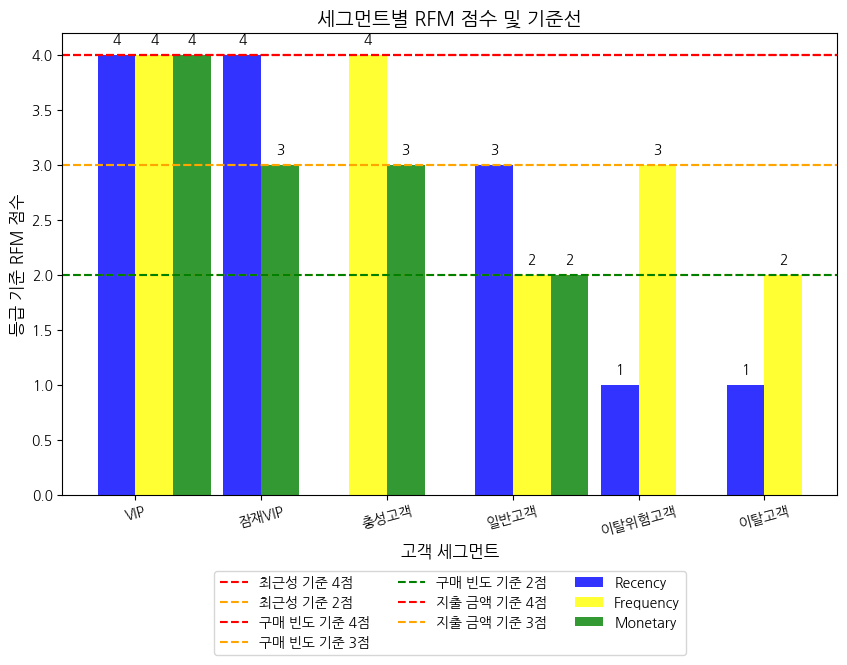

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import platform

# ✅ 한글 폰트 자동 설정
if platform.system() == 'Darwin':  # MacOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Colab 또는 Windows/Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 샘플 데이터 생성
np.random.seed(42)
data = pd.DataFrame({
    'CustomerID': range(1, 501),
    'Recency': np.random.randint(1, 5, 500),
    'Frequency': np.random.randint(1, 5, 500),
    'Monetary': np.random.randint(1, 5, 500)
})

# RFM 기반 세그먼트 분류 함수
def assign_segment(row):
    if row['Recency'] >= 4 and row['Frequency'] >= 4 and row['Monetary'] >= 4:
        return 'VIP'
    elif row['Frequency'] >= 4 and row['Monetary'] >= 3:
        return '충성고객'
    elif row['Recency'] >= 4 and row['Monetary'] >= 3:
        return '잠재VIP'
    elif row['Recency'] <= 1 and row['Frequency'] >= 3:
        return '이탈위험고객'
    elif row['Recency'] <= 1 and row['Frequency'] <= 2:
        return '이탈고객'
    else:
        return '일반고객'


# 세그먼트 할당
data['Segment'] = data.apply(assign_segment, axis=1)

# 세그먼트별 평균 RFM 점수 계산 및 정렬
segment_order = ["VIP", "잠재VIP", "충성고객", "일반고객", "이탈위험고객", "이탈고객"]
rfm_means = data.groupby("Segment")[["Recency", "Frequency", "Monetary"]].mean().round()
rfm_means = rfm_means.reindex(segment_order)

# 세그먼트별 필요한 RFM 요소 정의
segment_metrics = {
    "VIP": ["Recency", "Frequency", "Monetary"],
    "충성고객": ["Frequency", "Monetary"],
    "잠재VIP": ["Recency", "Monetary"],
    "이탈위험고객": ["Recency", "Frequency"],
    "이탈고객": ["Recency", "Frequency"],
    "일반고객": ["Recency", "Frequency", "Monetary"]
}

# RFM 요소별 색상 지정
rfm_colors = {"Recency": "blue", "Frequency": "yellow", "Monetary": "green"}

# 기준선 정의
thresholds = {
    "Recency": [4, 2],
    "Frequency": [4, 3, 2],
    "Monetary": [4, 3]
}

threshold_labels = {
    "Recency": ["최근성 기준 4점", "최근성 기준 2점"],
    "Frequency": ["구매 빈도 기준 4점", "구매 빈도 기준 3점", "구매 빈도 기준 2점"],
    "Monetary": ["지출 금액 기준 4점", "지출 금액 기준 3점"]
}

# 그래프 생성
plt.figure(figsize=(10, 6))
bar_width = 0.3
x = np.arange(len(rfm_means))

# 각 세그먼트별 필요한 RFM 요소만 시각화
for i, segment in enumerate(segment_order):
    metrics = segment_metrics[segment]
    for j, metric in enumerate(metrics):
        plt.bar(i + j * bar_width, rfm_means.loc[segment, metric], width=bar_width,
                label=f"{metric}" if i == 0 else "", alpha=0.8, color=rfm_colors[metric])

# 기준선 추가
colors = ['red', 'orange', 'green']
for metric, values in thresholds.items():
    for idx, value in enumerate(values):
        plt.axhline(y=value, color=colors[idx % len(colors)], linestyle='dashed', linewidth=1.5, label=threshold_labels[metric][idx])

# 값 라벨 추가
for i, segment in enumerate(segment_order):
    metrics = segment_metrics[segment]
    for j, metric in enumerate(metrics):
        plt.text(i + j * bar_width, rfm_means.loc[segment, metric] + 0.1, f"{int(rfm_means.loc[segment, metric])}", ha='center', fontsize=10)

# 그래프 설정
plt.xticks(x + bar_width / 2, segment_order, rotation=15)
plt.xlabel("고객 세그먼트", fontsize=12)
plt.ylabel("등급 기준 RFM 점수", fontsize=12)
plt.title("세그먼트별 RFM 점수 및 기준선", fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()



In [ ]:
rfm_df['Segment'].value_counts()

,count
Segment,
일반고객,45766
충성고객,18618
잠재VIP,13512
이탈고객,7936
이탈위험고객,7013
VIP,6596


In [ ]:
# 세그멘트별 고객 수 및 비율
segment_summary = rfm_df['Segment'].value_counts().reset_index()
segment_summary.columns = ['Segment', 'Customer_Count']
segment_summary['Percentage'] = (segment_summary['Customer_Count'] / segment_summary['Customer_Count'].sum() * 100).round(2)
print(segment_summary)

  Segment  Customer_Count  Percentage
0    일반고객           45766       46.02
1    충성고객           18618       18.72
2   잠재VIP           13512       13.59
3    이탈고객            7936        7.98
4  이탈위험고객            7013        7.05
5     VIP            6596        6.63


# 세그멘트별 고객 수 및 비율시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


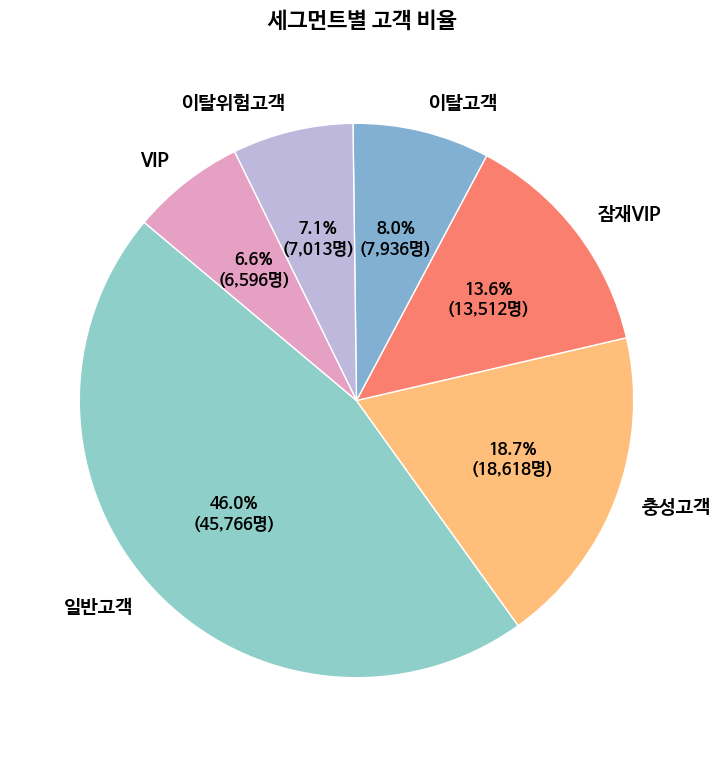

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 자동 설정
font_list = [f.name for f in fm.fontManager.ttflist if "Nanum" in f.name or "Malgun" in f.name or "AppleGothic" in f.name]
font_name = font_list[0] if font_list else "Arial"  # 한글 폰트가 없으면 기본 폰트 사용
plt.rc("font", family=font_name)

# 자동으로 고객 수와 비율을 함께 표시하는 함수
def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(round(pct * total / 100.0))  # 비율을 고객 수로 변환
    return f"{pct:.1f}%\n({absolute:,}명)"  # % + 고객 수 함께 표시

plt.figure(figsize=(9, 9))  # 그래프 크기 조정

# 색상 팔레트 변경 (부드러운 톤)
colors = ['#8ECFC9', '#FFBE7A', '#FA7F6F', '#82B0D2', '#BEB8DC', '#E6A0C4']

# labels에서 고객 수를 제외하여 중복 표시 방지
labels = segment_summary["Segment"]

# 파이 차트 생성
wedges, texts, autotexts = plt.pie(segment_summary["Customer_Count"],
                                   labels=labels,  # 세그먼트명만 표시
                                   autopct=lambda pct: autopct_format(pct, segment_summary["Customer_Count"]),
                                   colors=colors,
                                   startangle=140,
                                   textprops={'fontsize': 13, 'fontweight': 'bold'},  # 텍스트 크기 조정
                                   wedgeprops={"edgecolor": "white"})  # 구분선 추가

# 텍스트 스타일 조정
for text in texts:
    text.set_fontsize(14)  # 라벨 폰트 크기 키우기
    text.set_fontweight('bold')  # 글자 굵게

for autotext in autotexts:
    autotext.set_fontsize(12)  # 퍼센트 표시 크기 조정
    autotext.set_fontweight('bold')  # 글자 굵게
    autotext.set_color("black")  # 글자색 변경

# 제목 설정
plt.title("📊 세그먼트별 고객 비율", fontsize=16, fontweight='bold', pad=20)  # 제목 크기 및 패딩 조정

# 그래프 표시
plt.show()

In [ ]:
segment_rfm_means = rfm_df.groupby('Segment')[['R_Score','F_Score',	'M_Score',	'RFM_Score']].mean().reset_index()
print(segment_rfm_means)

  Segment   R_Score   F_Score   M_Score   RFM_Score
0     VIP  4.432535  4.544876  4.527289  493.229533
1    이탈고객  1.000000  1.491305  2.808846  117.721900
2  이탈위험고객  1.000000  3.635391  2.267931  138.621845
3    일반고객  3.240266  2.607569  2.291177  352.393436
4   잠재VIP  4.463588  2.020130  3.992451  470.552546
5    충성고객  2.462509  4.532119  3.836663  295.408798


In [ ]:
# 세그먼트별 평균 RFM 점수
segment_rfm_means = rfm_df.groupby('Segment')[['R_Score','F_Score',	'M_Score',	'RFM_Score']].mean().reset_index()
print(segment_rfm_means)

  Segment   R_Score   F_Score   M_Score   RFM_Score
0     VIP  4.432535  4.544876  4.527289  493.229533
1    이탈고객  1.000000  1.491305  2.808846  117.721900
2  이탈위험고객  1.000000  3.635391  2.267931  138.621845
3    일반고객  3.240266  2.607569  2.291177  352.393436
4   잠재VIP  4.463588  2.020130  3.992451  470.552546
5    충성고객  2.462509  4.532119  3.836663  295.408798


# 세그먼트별 평균 RFM 점수 시각화

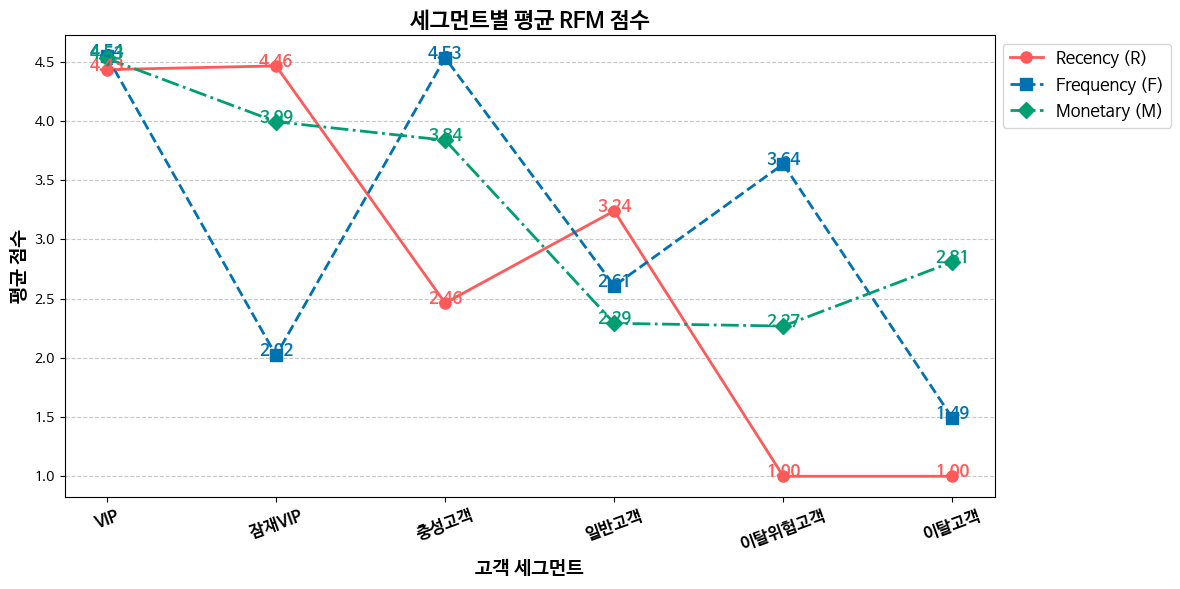

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 세그먼트별 평균 RFM 점수 데이터 준비 (순서 정렬)
desired_order = ["VIP", "잠재VIP", "충성고객", "일반고객", "이탈위험고객", "이탈고객"]
segment_rfm_means = segment_rfm_means.set_index("Segment").reindex(desired_order).reset_index()

segments = segment_rfm_means["Segment"]
r_scores = segment_rfm_means["R_Score"]
f_scores = segment_rfm_means["F_Score"]
m_scores = segment_rfm_means["M_Score"]

x = np.arange(len(segments))  # X축 위치 설정

plt.figure(figsize=(12, 6))

# ✅ 점 그래프 + 선 그래프 (RFM 각각 다르게 표시)
plt.plot(x, r_scores, marker="o", linestyle="-", color="#FF5959", label="Recency (R)", linewidth=2, markersize=8)
plt.plot(x, f_scores, marker="s", linestyle="--", color="#0072B2", label="Frequency (F)", linewidth=2, markersize=8)
plt.plot(x, m_scores, marker="D", linestyle="-.", color="#009E73", label="Monetary (M)", linewidth=2, markersize=8)

# ✅ 각 점에 숫자 표시 (가독성 향상)
for i in range(len(x)):
    plt.text(x[i], r_scores[i], f"{r_scores[i]:.2f}", fontsize=12, ha="center", color="#FF5959", fontweight="bold")
    plt.text(x[i], f_scores[i], f"{f_scores[i]:.2f}", fontsize=12, ha="center", color="#0072B2", fontweight="bold")
    plt.text(x[i], m_scores[i], f"{m_scores[i]:.2f}", fontsize=12, ha="center", color="#009E73", fontweight="bold")

# ✅ X축 세그먼트명 적용 & 스타일 개선
plt.xticks(x, segments, fontsize=12, rotation=20, fontweight="bold")

# ✅ 제목 & 축 스타일링
plt.title("세그먼트별 평균 RFM 점수", fontsize=16, fontweight="bold")
plt.xlabel("고객 세그먼트", fontsize=14, fontweight="bold")
plt.ylabel("평균 점수", fontsize=14, fontweight="bold")

# ✅ 범례 추가
plt.legend(fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))

# ✅ 그래프 스타일 정리
plt.grid(axis="y", linestyle="--", alpha=0.7)

# ✅ 그래프 출력
plt.show()


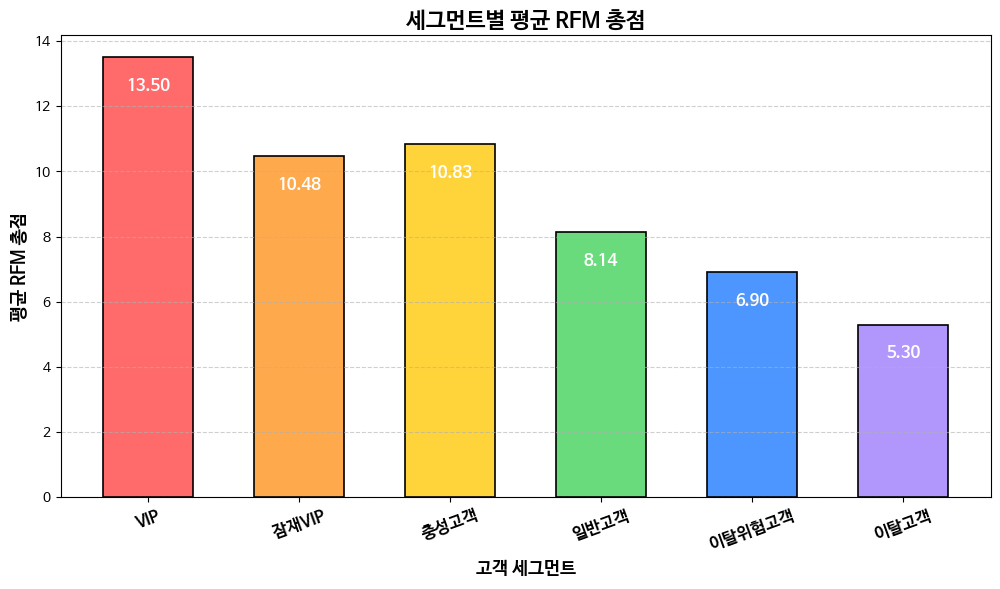

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

# 원하는 순서로 세그먼트 정렬
desired_order = ["VIP", "잠재VIP", "충성고객", "일반고객", "이탈위험고객", "이탈고객"]
segment_rfm_means = segment_rfm_means.set_index("Segment").loc[desired_order].reset_index()

# 세그먼트별 평균 RFM 총점 계산
segments = segment_rfm_means["Segment"]
rfm_total_scores = segment_rfm_means["R_Score"] + segment_rfm_means["F_Score"] + segment_rfm_means["M_Score"]

x = np.arange(len(segments))  # X축 위치 설정

# 각 세그먼트마다 다른 색상 설정 (고급스럽게 조합)
colors = ["#FF6B6B", "#FFA94D", "#FFD43B", "#69DB7C", "#4D96FF", "#B197FC"]

plt.figure(figsize=(12, 6))
bar_width = 0.6  # 막대 폭 설정

# RFM 총점 막대그래프 생성 (세그먼트별 다른 색상 적용)
bars = plt.bar(x, rfm_total_scores, width=bar_width, color=colors, edgecolor="black", linewidth=1.2)

# 막대 위가 아닌 내부에 값(Label) 추가 (가독성 고려)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 1, f"{height:.2f}",
             ha="center", fontsize=12, fontweight="bold", color="white")

# 둥근 모서리 효과 추가 (시각적 세련미)
for bar in bars:
    bar.set_linewidth(1.2)
    bar.set_edgecolor("black")
    bar.set_capstyle("round")

# X축 눈금 및 라벨 설정
plt.xticks(x, segments, fontsize=12, rotation=20, fontweight="bold")

# 제목 및 축 레이블 설정
plt.title("세그먼트별 평균 RFM 총점", fontsize=16, fontweight="bold")
plt.xlabel("고객 세그먼트", fontsize=13, fontweight="bold")
plt.ylabel("평균 RFM 총점", fontsize=13, fontweight="bold")

# 그래프 스타일 정리
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 그래프 표시
plt.show()






---



# 가설검증

- 1. "이탈 가능성이 높은 고객일수록 구매 취소율이 높을 것이다."  
- 2.  "VIP 고객일 수록 리뷰를 많이 남길 것이다."
- 3. "충성 고객은 특정 제품 카테고리를 반복적으로 구매할 가능성이 높을것이다"



 # 1. "이탈 가능성이 높은 고객일수록 구매 취소율이 높을 것이다."  

In [ ]:
import pandas as pd

# '취소된 주문' 필터링 (order_status == "canceled")
canceled_orders = o_df[o_df["order_status"] == "canceled"]

# 고객별 취소된 주문 수 계산
customer_canceled_orders = canceled_orders.groupby("customer_id")["order_id"].count().reset_index()
customer_canceled_orders.columns = ["customer_id", "canceled_order_count"]

# 고객별 전체 주문 수 계산
customer_total_orders = o_df.groupby("customer_id")["order_id"].count().reset_index()
customer_total_orders.columns = ["customer_id", "total_order_count"]

# 고객별 취소율 계산
customer_cancel_rate = pd.merge(customer_total_orders, customer_canceled_orders, on="customer_id", how="left")
customer_cancel_rate["canceled_order_count"] = customer_cancel_rate["canceled_order_count"].fillna(0)  # NaN 값 처리
customer_cancel_rate["cancel_rate"] = customer_cancel_rate["canceled_order_count"] / customer_cancel_rate["total_order_count"]

# 취소율 데이터 확인
print(customer_cancel_rate.head())


                        customer_id  total_order_count  canceled_order_count  \
0  00012a2ce6f8dcda20d059ce98491703                  1                   0.0   
1  000161a058600d5901f007fab4c27140                  1                   0.0   
2  0001fd6190edaaf884bcaf3d49edf079                  1                   0.0   
3  0002414f95344307404f0ace7a26f1d5                  1                   0.0   
4  000379cdec625522490c315e70c7a9fb                  1                   0.0   

   cancel_rate  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  


In [ ]:
# RFM 분석 결과와 취소율 데이터 결합
rfm_cancel_merged = pd.merge(rfm_df, customer_cancel_rate, on="customer_id", how="left")

# NaN 값 처리 (취소율이 없는 고객은 0으로 설정)
rfm_cancel_merged["cancel_rate"] = rfm_cancel_merged["cancel_rate"].fillna(0)

# 세그먼트별 평균 취소율 계산
segment_cancel_rates = rfm_cancel_merged.groupby("Segment")["cancel_rate"].mean().reset_index()

# 결과 확인
print(segment_cancel_rates)


  Segment  cancel_rate
0     VIP     0.001971
1    이탈고객     0.012853
2  이탈위험고객     0.008270
3    일반고객     0.007888
4   잠재VIP     0.002146
5    충성고객     0.003330


In [ ]:
# '취소된 주문' 필터링 (order_status == "canceled")
canceled_orders = o_df[o_df["order_status"] == "canceled"]

# 고객별 취소된 주문 수 계산
customer_canceled_orders = canceled_orders.groupby("customer_id")["order_id"].count().reset_index()
customer_canceled_orders.columns = ["customer_id", "canceled_order_count"]

# 고객별 전체 주문 수 계산
customer_total_orders = o_df.groupby("customer_id")["order_id"].count().reset_index()
customer_total_orders.columns = ["customer_id", "total_order_count"]

# 고객별 취소율 계산
customer_cancel_rate = pd.merge(customer_total_orders, customer_canceled_orders, on="customer_id", how="left")
customer_cancel_rate["canceled_order_count"] = customer_cancel_rate["canceled_order_count"].fillna(0)  # NaN 값 처리
customer_cancel_rate["cancel_rate"] = customer_cancel_rate["canceled_order_count"] / customer_cancel_rate["total_order_count"]

# 취소율 데이터 확인
print(customer_cancel_rate.head())


                        customer_id  total_order_count  canceled_order_count  \
0  00012a2ce6f8dcda20d059ce98491703                  1                   0.0   
1  000161a058600d5901f007fab4c27140                  1                   0.0   
2  0001fd6190edaaf884bcaf3d49edf079                  1                   0.0   
3  0002414f95344307404f0ace7a26f1d5                  1                   0.0   
4  000379cdec625522490c315e70c7a9fb                  1                   0.0   

   cancel_rate  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  


In [ ]:
# RFM 분석 결과와 취소율 데이터 결합
rfm_cancel_merged = pd.merge(rfm_df, customer_cancel_rate, on="customer_id", how="left")

# NaN 값 처리 (취소율이 없는 고객은 0으로 설정)
rfm_cancel_merged["cancel_rate"] = rfm_cancel_merged["cancel_rate"].fillna(0)

# 세그먼트별 평균 취소율 계산
segment_cancel_rates = rfm_cancel_merged.groupby("Segment")["cancel_rate"].mean().reset_index()

# 결과 확인
print(segment_cancel_rates)

  Segment  cancel_rate
0     VIP     0.001971
1    이탈고객     0.012853
2  이탈위험고객     0.008270
3    일반고객     0.007888
4   잠재VIP     0.002146
5    충성고객     0.003330


# 시각화

<ipython-input-82-b4063580391e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Segment", y="cancel_rate", data=segment_cancel_rates, palette="coolwarm")


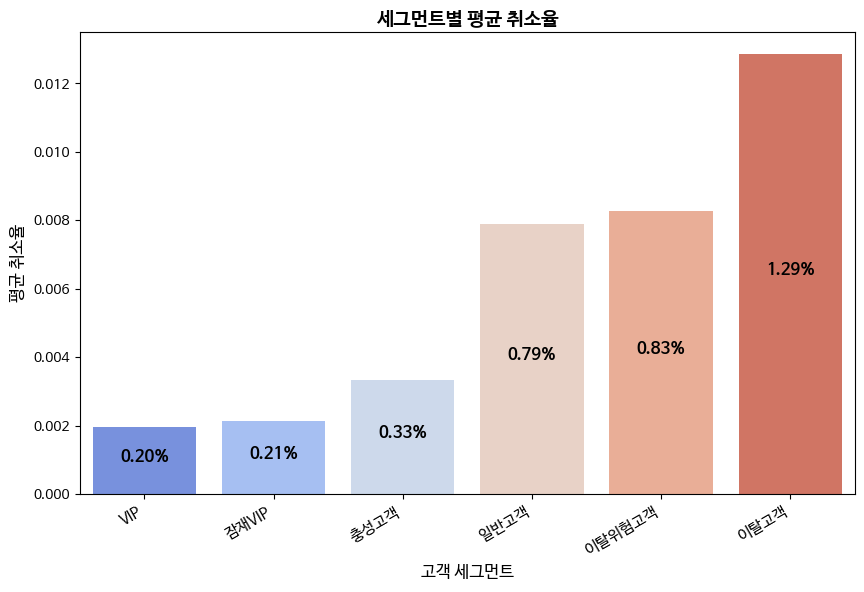

In [ ]:
# 세그먼트 정렬 순서 지정
segment_order = ["VIP", "잠재VIP", "충성고객", "일반고객", "이탈위험고객", "이탈고객"]
segment_cancel_rates["Segment"] = pd.Categorical(segment_cancel_rates["Segment"], categories=segment_order, ordered=True)
segment_cancel_rates = segment_cancel_rates.sort_values("Segment")

# 시각화 설정
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Segment", y="cancel_rate", data=segment_cancel_rates, palette="coolwarm")

# 그래프 제목 및 축 라벨 설정
plt.title("세그먼트별 평균 취소율", fontsize=14, fontweight='bold')
plt.xlabel("고객 세그먼트", fontsize=12)
plt.ylabel("평균 취소율", fontsize=12)
plt.xticks(rotation=30, ha="right", fontsize=11)

# 각 바의 중앙에 퍼센트 값 추가
for i, v in enumerate(segment_cancel_rates["cancel_rate"]):
    plt.text(i, v / 2, f"{v:.2%}", ha='center', fontsize=12, fontweight='bold', color="black")  # 텍스트를 바 안에 배치

plt.show()



---



# 2.   "VIP 고객일 수록 리뷰를 많이 남길 것이다."

In [ ]:
# 예시 파일 경로
csv_file = os.path.join(path, "olist_order_reviews_dataset.csv")

# Pandas로 CSV 파일 불러오기
re = pd.read_csv(csv_file)

# 데이터 미리보기
re.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
r_df = re[['order_id', 'review_score']] #필요한 컬럼만 추출
r_df.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [ ]:
# 주문 데이터(o_df)와 리뷰 데이터(r_df)를 order_id 기준으로 병합
customer_reviews = pd.merge(o_df[['order_id', 'customer_id']], r_df, on="order_id", how="inner")

# 고객별 리뷰 개수 계산
customer_review_counts = customer_reviews.groupby("customer_id")["review_score"].count().reset_index()
customer_review_counts.columns = ["customer_id", "review_count"]

# 고객별 평균 리뷰 점수 계산
customer_avg_review_score = customer_reviews.groupby("customer_id")["review_score"].mean().reset_index()
customer_avg_review_score.columns = ["customer_id", "avg_review_score"]

# 고객별 리뷰 개수 & 평균 점수 병합
customer_review_stats = pd.merge(customer_review_counts, customer_avg_review_score, on="customer_id", how="left")

# 리뷰 데이터 확인
print(customer_review_stats.head())

                        customer_id  review_count  avg_review_score
0  00012a2ce6f8dcda20d059ce98491703             1               1.0
1  000161a058600d5901f007fab4c27140             1               4.0
2  0001fd6190edaaf884bcaf3d49edf079             1               5.0
3  0002414f95344307404f0ace7a26f1d5             1               5.0
4  000379cdec625522490c315e70c7a9fb             1               4.0


In [ ]:
# RFM 데이터(rfm_df)와 리뷰 통계 데이터 병합
rfm_reviews_merged = pd.merge(rfm_df, customer_review_stats, on="customer_id", how="left")

# 세그먼트별 평균 리뷰 개수 및 평균 리뷰 점수 계산
segment_review_stats = rfm_reviews_merged.groupby("Segment")[["review_count", "avg_review_score"]].mean().reset_index()

# 결과 확인
print(segment_review_stats)

  Segment  review_count  avg_review_score
0     VIP      1.001068          4.001296
1    이탈고객      1.004830          4.095822
2  이탈위험고객      1.010203          4.127173
3    일반고객      1.006252          4.105711
4   잠재VIP      1.001043          4.182245
5    충성고객      1.007430          3.981995


# 시각화

<ipython-input-87-bfd3e21e3eaf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_review_stats, x="Segment", y="review_count", palette=colors, ax=ax1, alpha=0.7)


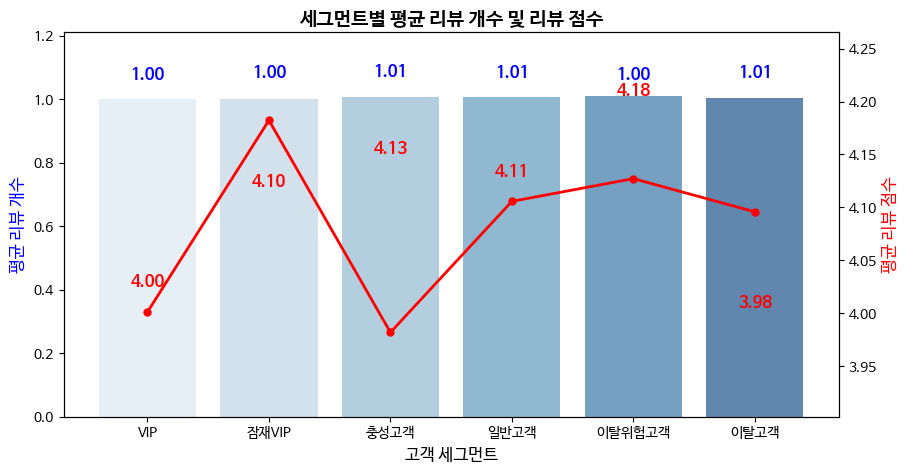

In [ ]:
# 세그먼트 정렬 순서 지정
segment_order = ["VIP", "잠재VIP", "충성고객", "일반고객", "이탈위험고객", "이탈고객"]
segment_review_stats["Segment"] = pd.Categorical(segment_review_stats["Segment"], categories=segment_order, ordered=True)
segment_review_stats = segment_review_stats.sort_values("Segment")

# 시각화 설정
fig, ax1 = plt.subplots(figsize=(10, 5))

# 막대 그래프 (세그먼트별 평균 리뷰 개수)
colors = sns.color_palette("Blues", len(segment_review_stats))
sns.barplot(data=segment_review_stats, x="Segment", y="review_count", palette=colors, ax=ax1, alpha=0.7)
ax1.set_ylabel("평균 리뷰 개수", fontsize=12, color="blue")
ax1.set_xlabel("고객 세그먼트", fontsize=12)
ax1.set_title("세그먼트별 평균 리뷰 개수 및 리뷰 점수", fontsize=14, fontweight="bold")

# 두 번째 축 (평균 리뷰 점수)
ax2 = ax1.twinx()
ax2.plot(segment_review_stats["Segment"], segment_review_stats["avg_review_score"], marker="o", color="red", linestyle="-", linewidth=2, markersize=5)
ax2.set_ylabel("평균 리뷰 점수", fontsize=12, color="red")

# 각 막대 위에 수치 라벨 추가
for index, row in segment_review_stats.iterrows():
    ax1.text(index, row["review_count"] + 0.05, f"{row['review_count']:.2f}", ha="center", va="bottom", fontsize=12, fontweight="bold", color="blue")
    ax2.text(index, row["avg_review_score"] + 0.02, f"{row['avg_review_score']:.2f}", ha="center", va="bottom", fontsize=12, fontweight="bold", color="red")

# 전체 스타일 조정
ax1.set_ylim(0, max(segment_review_stats["review_count"]) * 1.2)
ax2.set_ylim(min(segment_review_stats["avg_review_score"]) * 0.98, max(segment_review_stats["avg_review_score"]) * 1.02)
plt.show()



---

# 3. "고객 세그먼트에 따라 특정 제품 카테고리를 지속적으로 구매할 확률이 높을 것이다."

In [ ]:
# 예시 파일 경로
# 예시 파일 경로
csv_file = os.path.join(path, "olist_products_dataset.csv")

# Pandas로 CSV 파일 불러오기
pr = pd.read_csv(csv_file)

# 데이터 미리보기
pr.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# 필요한 컬럼만 선택하여 제품 데이터 생성
products_df = pr[["product_id", "product_category_name"]].copy()

# 주문 데이터(f_df)와 제품 데이터 병합 (product_id 기준)
f_df = pd.merge(f_df, products_df, on="product_id", how="left")

# 고객별 최다 구매 제품 카테고리 찾기
customer_top_category = f_df.groupby(["customer_id", "product_category_name"])["order_id"].count().reset_index()
customer_top_category = customer_top_category.sort_values(["customer_id", "order_id"], ascending=[True, False])

# 각 고객별 최다 구매 카테고리 선택 (첫 번째 값)
customer_top_category = customer_top_category.groupby("customer_id").first().reset_index()
customer_top_category.columns = ["customer_id", "top_category", "order_count"]

# RFM 데이터와 병합하여 세그먼트별 분석 가능하도록 설정
rfm_category_merged = pd.merge(rfm_df, customer_top_category, on="customer_id", how="left")

# 세그먼트별 최다 구매 카테고리 분석
segment_category_counts = rfm_category_merged.groupby(["Segment", "top_category"])["customer_id"].count().reset_index()
segment_category_counts.columns = ["Segment", "top_category", "count"]

# 세그먼트별 상위 10개 제품 카테고리 선정
segment_top_categories = segment_category_counts.groupby("Segment").apply(lambda x: x.nlargest(10, "count")).reset_index(drop=True)

# 결과 확인
print(segment_top_categories)

   Segment            top_category  count
0      VIP            beleza_saude    828
1      VIP      relogios_presentes    708
2      VIP         cama_mesa_banho    664
3      VIP  informatica_acessorios    587
4      VIP        moveis_decoracao    515
5      VIP           esporte_lazer    390
6      VIP      ferramentas_jardim    303
7      VIP   utilidades_domesticas    291
8      VIP              cool_stuff    208
9      VIP                   bebes    174
10    이탈고객         cama_mesa_banho    726
11    이탈고객            beleza_saude    599
12    이탈고객           esporte_lazer    587
13    이탈고객        moveis_decoracao    556
14    이탈고객  informatica_acessorios    478
15    이탈고객   utilidades_domesticas    471
16    이탈고객              cool_stuff    465
17    이탈고객              brinquedos    384
18    이탈고객               telefonia    384
19    이탈고객              perfumaria    306
20  이탈위험고객        moveis_decoracao    661
21  이탈위험고객         cama_mesa_banho    604
22  이탈위험고객           esporte_lazer

<ipython-input-89-00b2bacbcf72>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_top_categories = segment_category_counts.groupby("Segment").apply(lambda x: x.nlargest(10, "count")).reset_index(drop=True)


<ipython-input-90-2ada3cc14e43>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="top_category", data=segment_data, ax=ax, palette="coolwarm")
<ipython-input-90-2ada3cc14e43>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="top_category", data=segment_data, ax=ax, palette="coolwarm")
<ipython-input-90-2ada3cc14e43>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="top_category", data=segment_data, ax=ax, palette="coolwarm")
<ipython-input-90-2ada3cc14e43>:14: FutureWarning: 

Passing `palette` witho

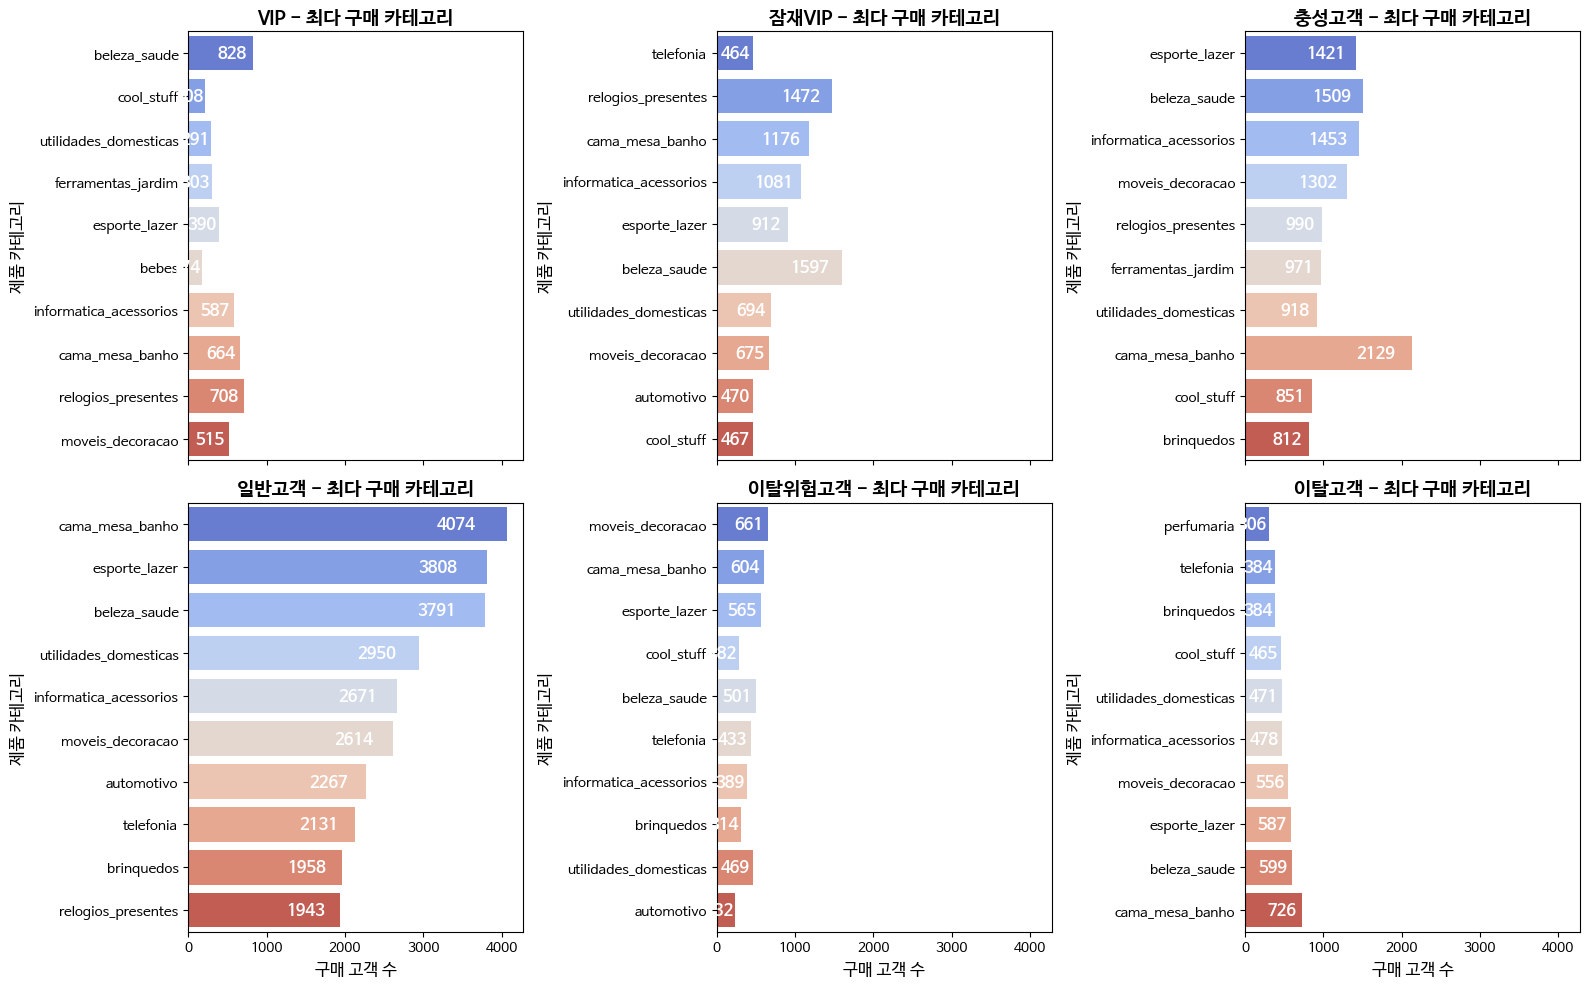

In [ ]:
#  원하는 순서로 정렬
desired_order = ["VIP", "잠재VIP", "충성고객", "일반고객", "이탈위험고객", "이탈고객"]
segment_top_categories["Segment"] = pd.Categorical(segment_top_categories["Segment"], categories=desired_order, ordered=True)
segment_top_categories = segment_top_categories.sort_values("Segment")

# 서브플롯 설정 (왼쪽 3개, 오른쪽 3개)
fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharex=True)
axes = axes.flatten()

# 세그먼트별 시각화
for i, segment in enumerate(desired_order):
    segment_data = segment_top_categories[segment_top_categories["Segment"] == segment]
    ax = axes[i]
    sns.barplot(x="count", y="top_category", data=segment_data, ax=ax, palette="coolwarm")

    ax.set_title(f"{segment} - 최다 구매 카테고리", fontsize=14, fontweight="bold")
    ax.set_xlabel("구매 고객 수", fontsize=12)
    ax.set_ylabel("제품 카테고리", fontsize=12)

    #  각 바 안쪽에 수치 라벨 추가
    for index, value in enumerate(segment_data["count"]):
        ax.text(value - (value * 0.1), index, f"{value}", ha="right", va="center", fontsize=12, fontweight="bold", color="white")

# 전체 스타일 조정
plt.tight_layout()
plt.show()

In [ ]:
%

UsageError: Line magic function `%` not found.
